In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process


In [3]:
from datagovindia import DataGovIndia
datagovin = DataGovIndia() # Specify API key if not set as an environment variable
# datagovin.sync_metadata()

In [4]:
search_data = datagovin.search('Wheat') 


In [5]:
search_data

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
0,e54543a8-273e-4fa3-ba09-753b85c9858d,Date-wise Detials of Actual Stock of Wheat and...,Date-wise Detials of Actual Stock of Wheat and...,Central,"[document_id, as_on_date_, wheat___actual_stoc...",[Rajya Sabha],data.gov.in,[All],2024-05-31T10:53:21+00:00,2024-06-07T12:30:20+00:00
1,24c6a331-9cb3-4e5f-b422-a4b33a329f70,Year-wise Details of Per Capita Net Availabili...,Year-wise Details of Per Capita Net Availabili...,Central,"[document_id, _year, net_availability_of_wheat...",[Rajya Sabha],data.gov.in,[All],2024-05-08T08:52:10+00:00,2024-05-08T14:16:21+00:00
2,f8340bd2-2b3c-4049-84bd-89da9f98d76a,Year-wise Details of Procurement of Wheat and ...,Year-wise Details of Procurement of Wheat and ...,Central,"[document_id, kms_rms, wheat___quantity_procur...",[Rajya Sabha],data.gov.in,[All],2024-05-08T08:50:53+00:00,2024-05-08T14:16:19+00:00
3,3a771de4-2fcc-4f6c-aced-59d185e0ebb7,State/UT-wise Details of Procurement of Wheat ...,State/UT-wise Details of Procurement of Wheat ...,Central,"[document_id, sl__no_, state_ut, quantity_proc...",[Rajya Sabha],data.gov.in,[All],2024-05-08T08:36:05+00:00,2024-05-08T14:15:54+00:00
4,dff4f1e4-e325-4fd3-ab32-0074117068d6,State/UT-wise Details of Allocation& Offtake o...,State/UT-wise Details of Allocation& Offtake o...,Central,"[document_id, sl__no, states_ut, _2013_14___al...",[Rajya Sabha],data.gov.in,[All],2024-05-08T08:17:10+00:00,2024-05-08T14:15:19+00:00
...,...,...,...,...,...,...,...,...,...,...
503,aa1bad9f-8379-4651-a8d0-151fb54b7b5b,Region-wise Number of Purchase Centers Operate...,Region-wise Number of Purchase Centers Operate...,Central,"[document_id, sr_no, region, rabi_market_seaso...",[Rajya Sabha],data.gov.in,[All],2018-12-21T12:18:13+00:00,2018-12-21T12:18:13+00:00
504,80c5ccc8-d9e0-41f0-81ca-ea2217509011,Essential Commodities distributed through Fair...,Essential Commodities distributed through Fair...,State,"[document_id, _sl_no, district, apr_14, may_14...","[Tamil Nadu, Planning, Development and Special...",tn.data.gov.in,[Statistics],2018-10-03T17:56:02+00:00,2018-11-30T01:27:56+00:00
505,81f900a8-4ea4-4cf8-84ab-56dc4ef03fc8,District wise Wheat Production in Madhya Prade...,District wise Wheat Production in Madhya Prade...,State,"[document_id, district, _2006_to_2007_in_metri...","[Madhya Pradesh, Planning, Economics and Stati...",data.gov.in,[Statistics],2017-08-17T10:19:55+00:00,2018-11-29T23:41:37+00:00
506,b9528b08-05d1-4764-9093-67458558eff2,Weekly wholesale price of Wheat upto 2012,Weekly wholesale price of Wheat upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:13+00:00,2018-05-25T13:03:28+00:00


In [9]:

search_term = " Consumer Affairs"

def find_similar_rows(search_data, column_name, search_term, threshold=80):
    # Create a mapping of index to choice values
    choices = search_data[column_name].tolist()
    index_mapping = {i: choice for i, choice in enumerate(choices)}
    
    # Perform fuzzy matching
    matches = process.extract(search_term, choices, limit=None)
    
    # Debug: Print the matches and scores
    # print("Matches and Scores:")
    # for match in matches:
        # print(match)
    
    # Create a DataFrame from the matches
    matches_df = pd.DataFrame(matches, columns=['match', 'score'])
    
    # Debug: Print the matches DataFrame
    # print("\nMatches DataFrame:")
    # print(matches_df)
    
    # Filter matches above the threshold
    matches_above_threshold = matches_df[matches_df['score'] >= threshold]
    
    # Debug: Print the filtered matches
    # print("\nFiltered Matches Above Threshold:")
    # print(matches_above_threshold)
    
    # Get the original indices of the matching rows
    matching_indices = [i for i, choice in enumerate(choices) if any(match == choice for match, score in matches if score >= threshold)]
    
    # Debug: Print the matching indices
    # print("\nMatching Indices:")
    # print(matching_indices)
    
    # Retrieve rows corresponding to the matching indices
    similar_rows = search_data.iloc[matching_indices]
    return pd.DataFrame(similar_rows)

# Find similar rows
similar_rows_df = find_similar_rows(search_data, 'sectors', search_term)

# print("\nSimilar Rows:")
similar_rows_df

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
65,6c9581ed-2421-4ed0-a186-e33cd5c6706b,Weekly retail price of Atta (Wheat) upto 2012,Weekly retail price of Atta (Wheat) upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Consumer Affairs, Consumer Affairs]",2023-02-16T08:22:29+00:00,2023-02-16T15:32:40+00:00
166,dc9dcb6c-7fd6-494d-99b3-baad5380addc,Daily wholesale price of Atta (Wheat) upto Apr...,Daily wholesale price of Atta (Wheat) upto Apr...,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-12-08T09:55:31+00:00,2022-12-08T15:52:25+00:00
167,8b7e1db5-0b1d-4b48-bd87-00005ca9ade5,Weekly wholesale price of Atta (Wheat) upto 2012,Weekly wholesale price of Atta (Wheat) upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-12-08T10:17:42+00:00,2022-12-08T15:52:25+00:00
506,b9528b08-05d1-4764-9093-67458558eff2,Weekly wholesale price of Wheat upto 2012,Weekly wholesale price of Wheat upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:13+00:00,2018-05-25T13:03:28+00:00
507,39c1865b-5483-41f6-9c9b-3d32c0d63824,Daily wholesale price of Wheat upto April - 2015,Daily wholesale price of Wheat upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00


In [10]:
wheat_week = datagovin.get_data("b9528b08-05d1-4764-9093-67458558eff2")

In [35]:
wheat_week.head()

,date,zone,centre,price
0,06-01-93,1,HISAR,320
1,06-01-93,1,KARNAL,320
2,06-01-93,1,SHIMLA,NA
3,06-01-93,1,MANDI,NA
4,06-01-93,1,SRINAGAR,NA


In [12]:
wheat_week['zone'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [13]:
wheat_zone1 = wheat_week[wheat_week['zone'] == '1']
wheat_zone2 = wheat_week[wheat_week['zone'] == '2']
wheat_zone3 = wheat_week[wheat_week['zone'] == '3']
wheat_zone4 = wheat_week[wheat_week['zone'] == '4']

In [14]:
wheat_zone1.loc[wheat_zone1['price'] == 'NA', 'price'] = np.nan
wheat_zone2.loc[wheat_zone2['price'] == 'NA', 'price'] = np.nan
wheat_zone3.loc[wheat_zone3['price'] == 'NA', 'price'] = np.nan
wheat_zone4.loc[wheat_zone4['price'] == 'NA', 'price'] = np.nan

/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_8411/501760652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat_zone1.loc[wheat_zone1['price'] == 'NA', 'price'] = np.nan
/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_8411/501760652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat_zone2.loc[wheat_zone2['price'] == 'NA', 'price'] = np.nan
/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_8411/501760652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [15]:
wheat_zone1 = wheat_zone1.reset_index(drop=True)
wheat_zone2 = wheat_zone2.reset_index(drop=True)
wheat_zone3 = wheat_zone3.reset_index(drop=True)
wheat_zone4 = wheat_zone4.reset_index(drop=True)

In [16]:
wheat_zone1['date'] = pd.to_datetime(wheat_zone1['date'], format='%d-%m-%y')
wheat_zone2['date'] = pd.to_datetime(wheat_zone2['date'], format='%d-%m-%y')
wheat_zone3['date'] = pd.to_datetime(wheat_zone3['date'], format='%d-%m-%y')
wheat_zone4['date'] = pd.to_datetime(wheat_zone4['date'], format='%d-%m-%y')



In [31]:
wheat_zone1['price'].isnull().sum()

np.int64(4174)

In [17]:
print(wheat_zone1.dtypes)

date      datetime64[ns]
zone              object
centre            object
price             object
dtype: object


In [18]:
wheat_zone1['price'] = pd.to_numeric(wheat_zone1['price'], errors='coerce')
wheat_zone2['price'] = pd.to_numeric(wheat_zone2['price'], errors='coerce')
wheat_zone3['price'] = pd.to_numeric(wheat_zone3['price'], errors='coerce')
wheat_zone4['price'] = pd.to_numeric(wheat_zone4['price'], errors='coerce')

In [19]:
wheat_zone1_average_prices = wheat_zone1.groupby('date')['price'].mean().reset_index().round(2)
wheat_zone2_average_prices = wheat_zone2.groupby('date')['price'].mean().reset_index().round(2)
wheat_zone3_average_prices = wheat_zone3.groupby('date')['price'].mean().reset_index().round(2)
wheat_zone4_average_prices = wheat_zone4.groupby('date')['price'].mean().reset_index().round(2)


In [20]:
wheat_zone4_average_prices[:20]

,date,price
0,1993-01-06,621.20
1,1993-01-13,636.83
2,1993-01-20,637.67
3,1993-01-27,631.83
4,1993-02-03,618.20
5,1993-02-10,636.00
6,1993-02-17,596.50
7,1993-02-24,591.20
8,1993-03-03,585.20
9,1993-03-10,495.80


In [145]:
wheat_zone1_average_prices.to_csv('dataset/wheat/wheat_zone1_average_prices.csv', sep=',', index=False, encoding='utf-8')

In [144]:
wheat_zone2_average_prices.to_csv('dataset/wheat/wheat_zone2_average_prices.csv', sep=',', index=False, encoding='utf-8')
wheat_zone3_average_prices.to_csv('dataset/wheat/wheat_zone3_average_prices.csv', sep=',', index=False, encoding='utf-8')
wheat_zone4_average_prices.to_csv('dataset/wheat/wheat_zone4_average_prices.csv', sep=',', index=False, encoding='utf-8')

<Axes: xlabel='date', ylabel='price'>

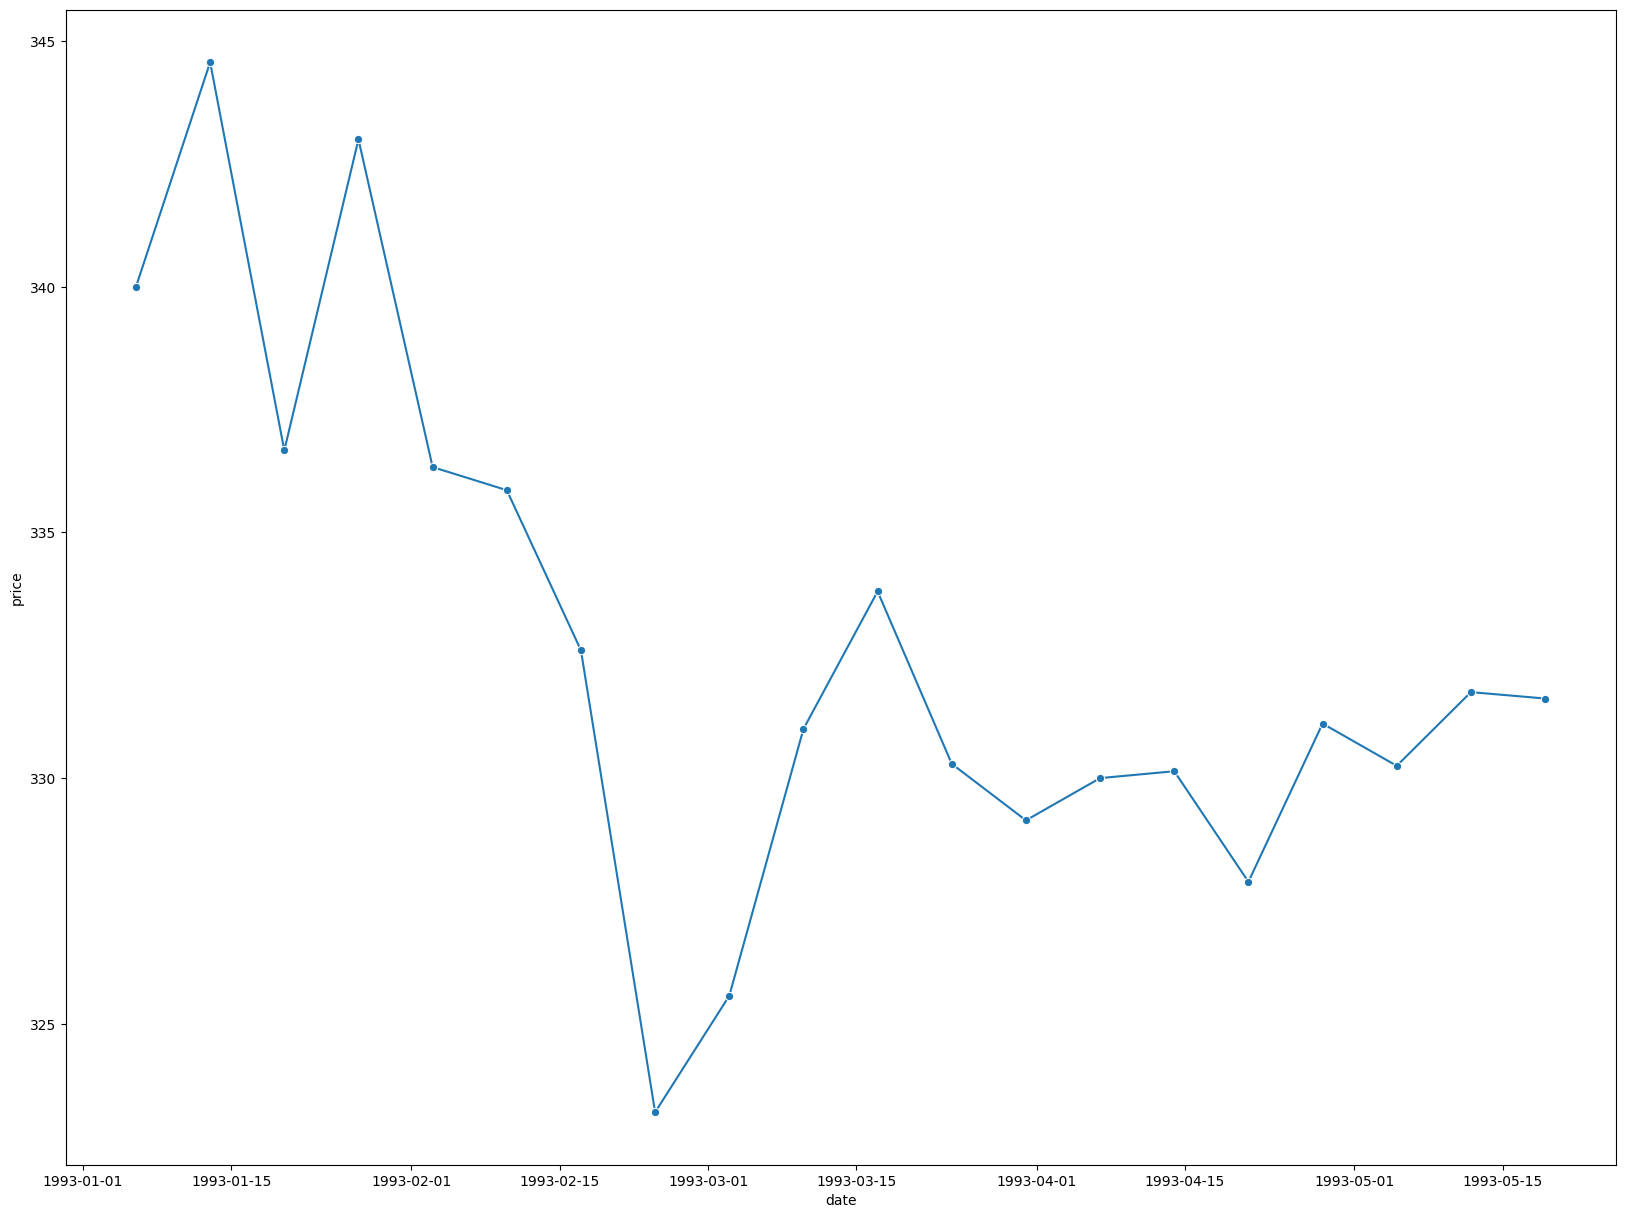

In [21]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=wheat_zone1_average_prices[:20], marker='o')

<Axes: xlabel='date', ylabel='price'>

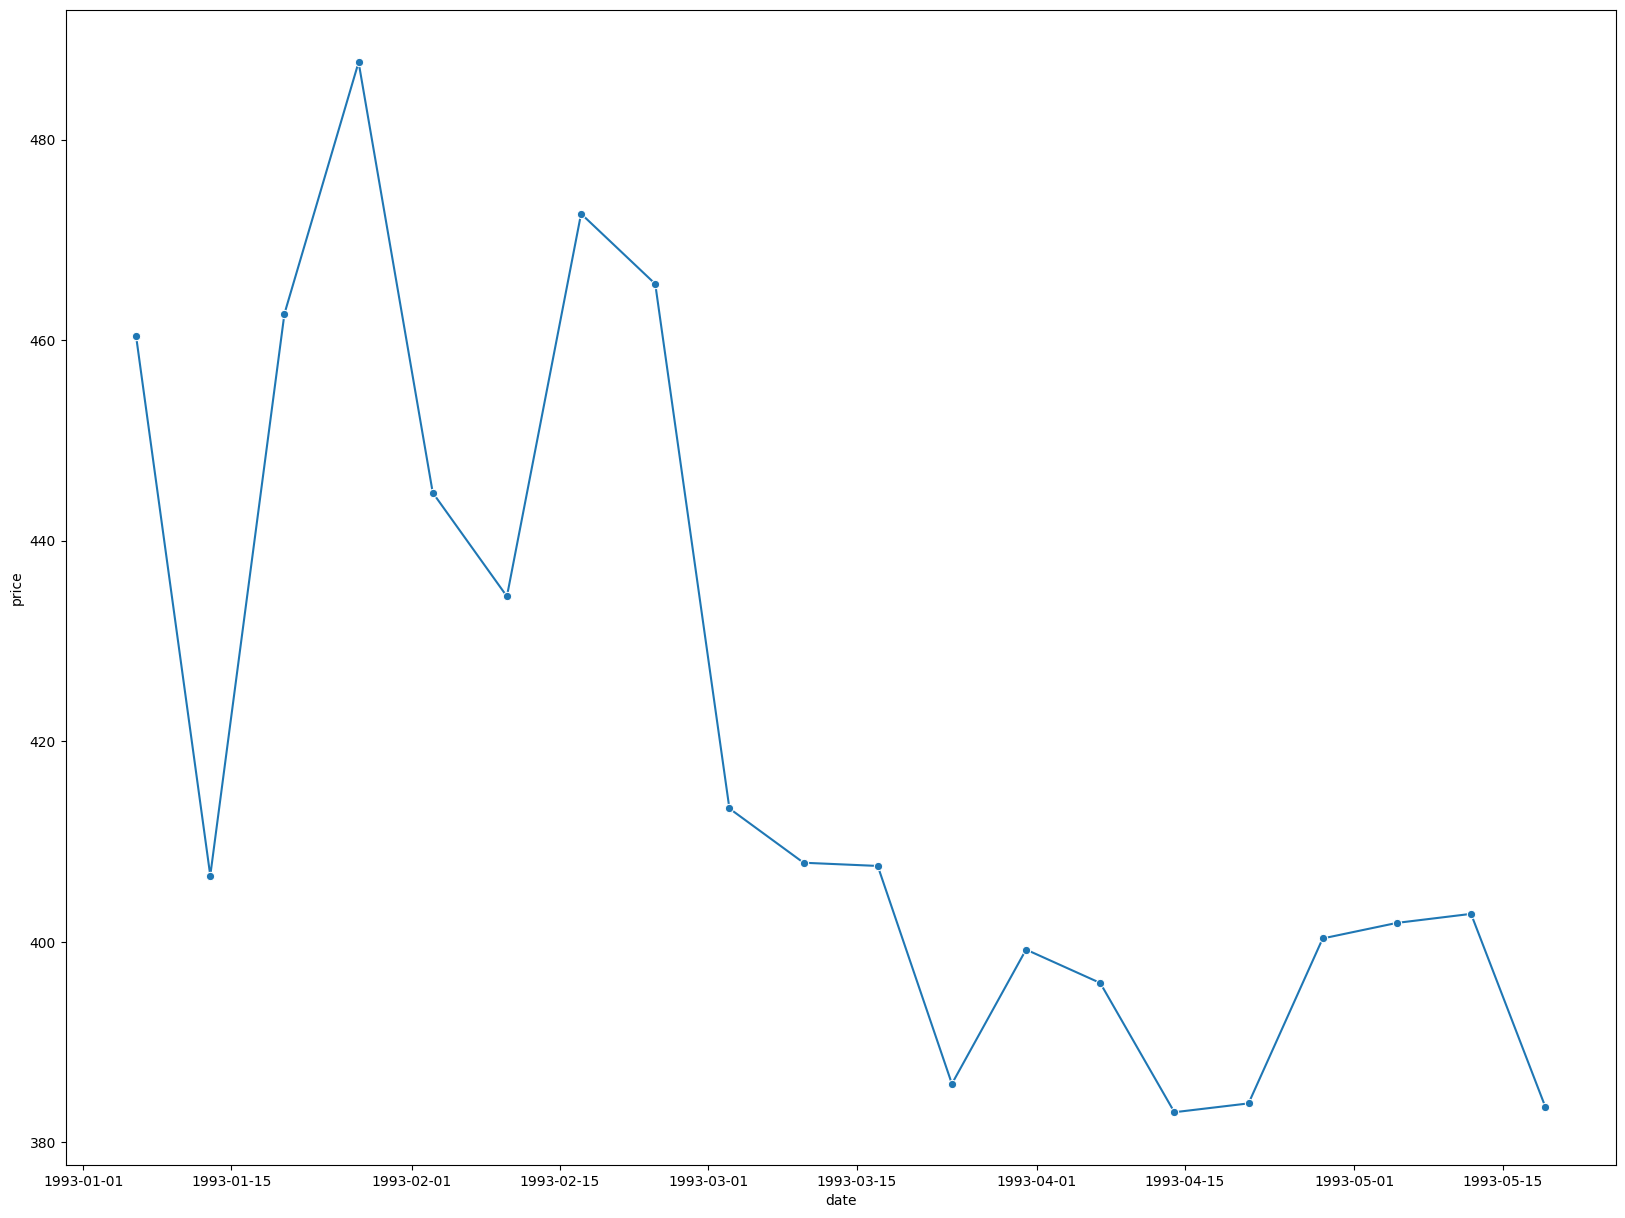

In [22]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=wheat_zone2_average_prices[:20], marker='o')

<Axes: xlabel='date', ylabel='price'>

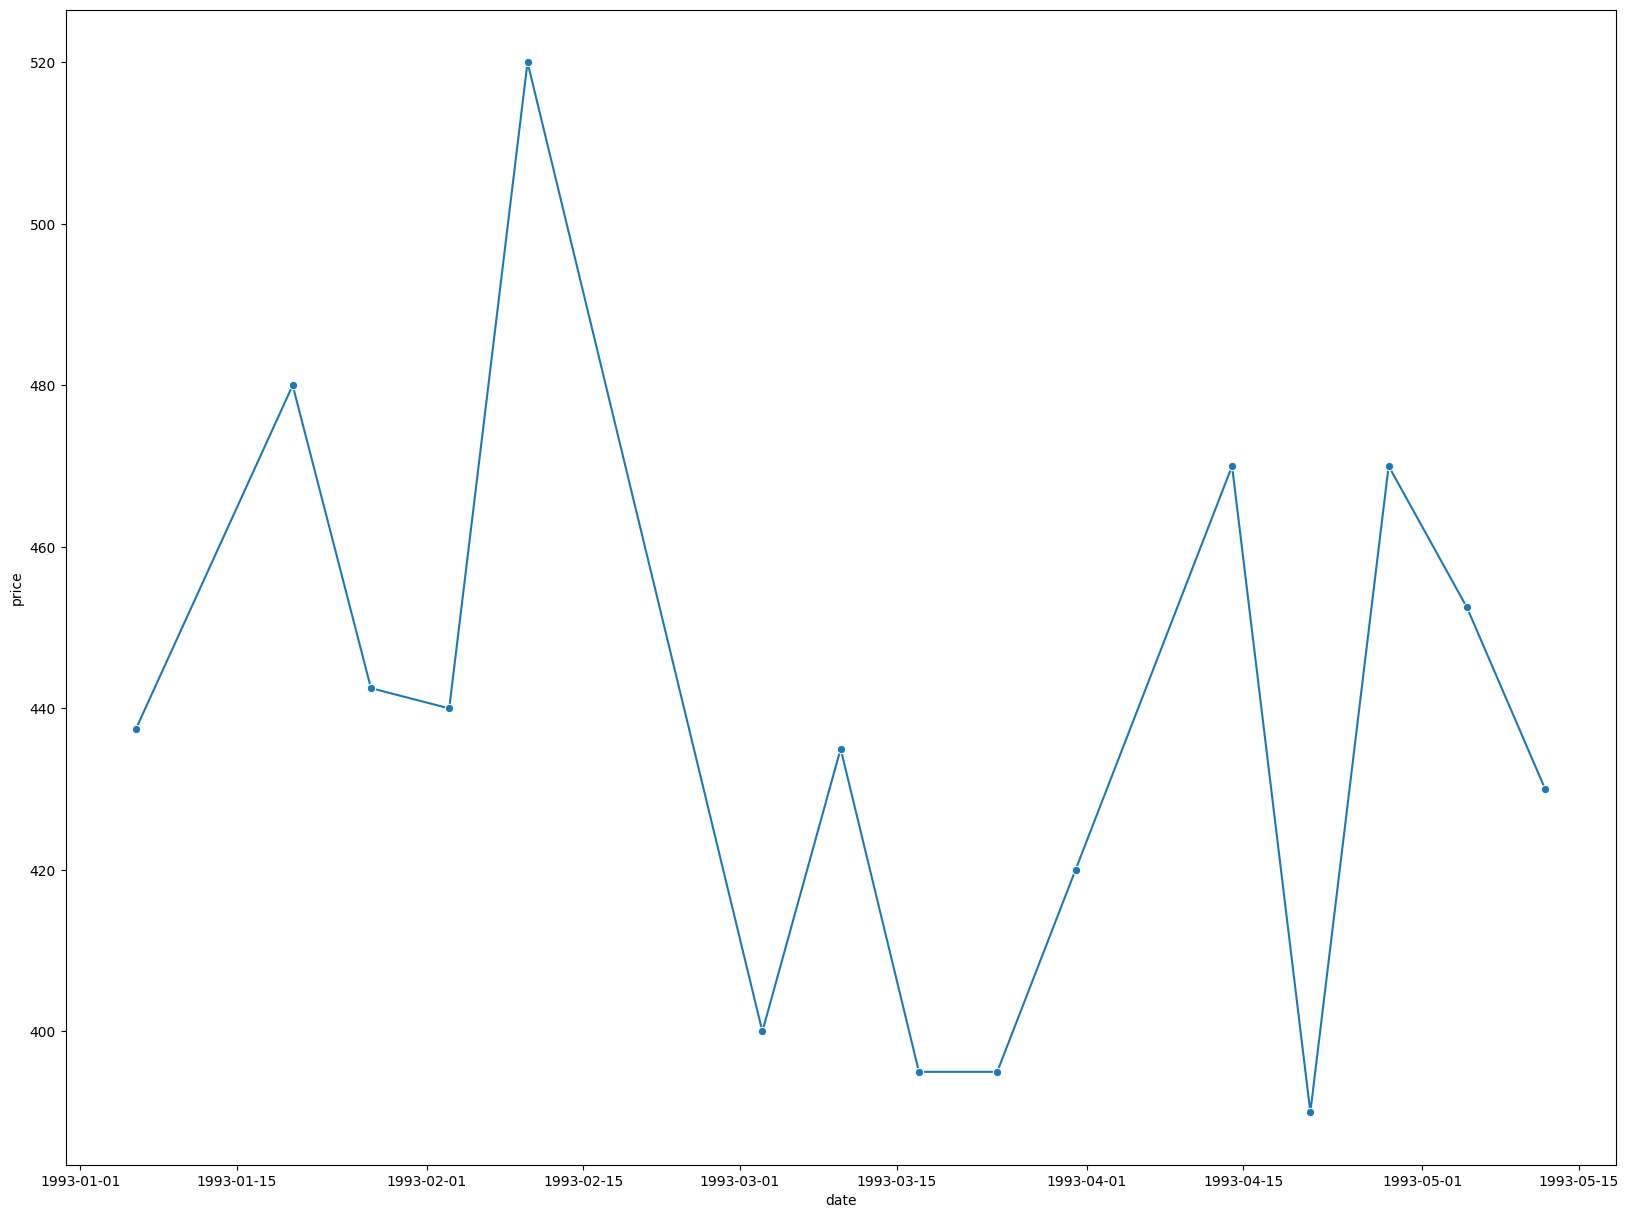

In [23]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=wheat_zone3_average_prices[:20], marker='o')

<Axes: xlabel='date', ylabel='price'>

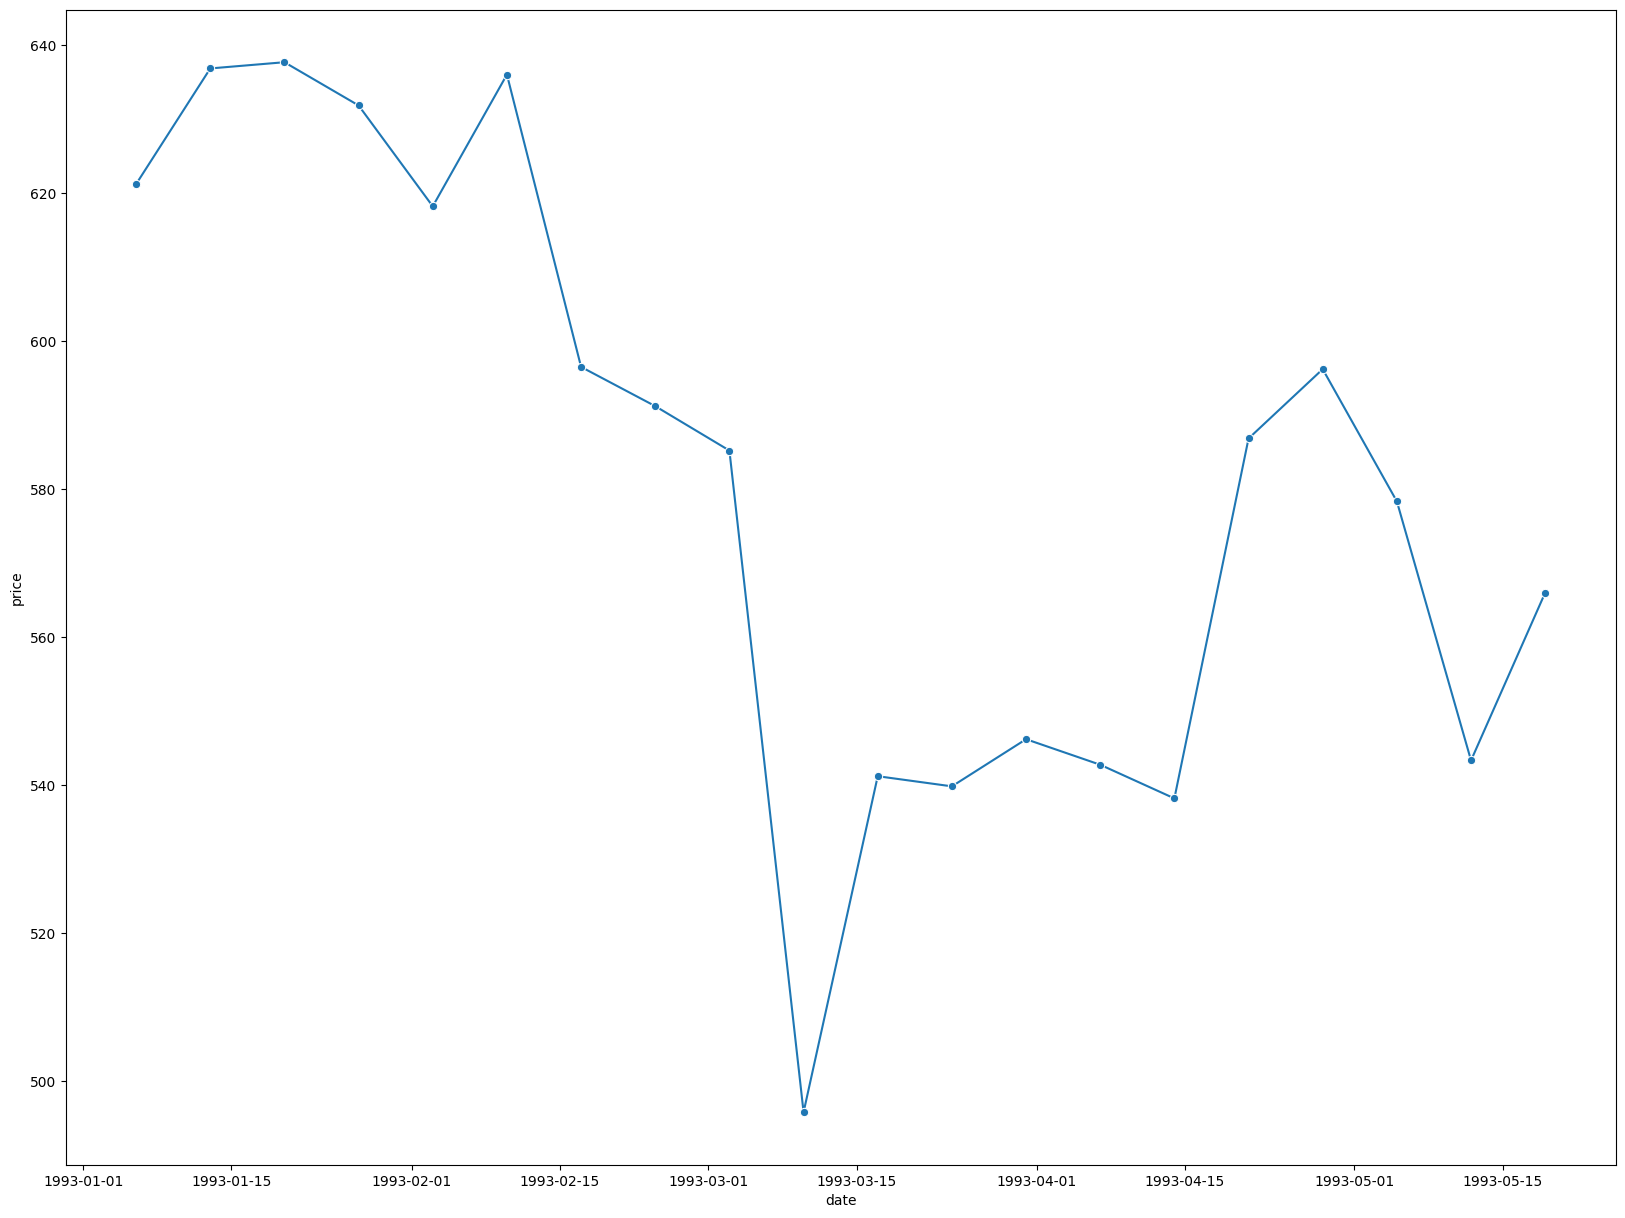

In [24]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=wheat_zone4_average_prices[:20], marker='o')

# End -- Wheat

In [177]:
search_data = datagovin.search('Milk') 
search_data

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
0,38ab59d1-69b6-4edb-a21f-c9bc1222833f,Year-wise Details of Consumer Price Index for ...,Year-wise Details of Consumer Price Index for ...,Central,"[document_id, _sl__no_, month, cpi_milk_and_pr...",[Rajya Sabha],data.gov.in,[All],2024-04-14T14:55:42+00:00,2024-04-15T11:10:02+00:00
1,c78baa2d-1522-4270-a983-f370168e1d0f,Year-wise Details of the Prices of Tonned Milk...,Year-wise Details of the Prices of Tonned Milk...,Central,"[document_id, month, toned_milk__rs_per_litre_...",[Rajya Sabha],data.gov.in,[All],2024-03-22T14:35:02+00:00,2024-03-27T12:07:21+00:00
2,19201171-991e-47bc-9a74-cbe005cf05a3,The State-wise Estimated milk production durin...,The State-wise Estimated milk production durin...,Central,"[document_id, _si__no_, states_uts, __2014_15,...",[Rajya Sabha],data.gov.in,[All],2023-12-07T18:44:34+00:00,2023-12-08T09:47:11+00:00
3,ec9a8de3-7365-4a8b-9aaf-c07165168345,State/UT-wise Annual Public Laboratory Testing...,State/UT-wise Annual Public Laboratory Testing...,Central,"[document_id, _sl_no, state_ut, total_no__of_s...",[Rajya Sabha],data.gov.in,[All],2023-12-03T16:18:38+00:00,2023-12-05T10:35:44+00:00
4,ee7ed695-d330-42b9-ac08-315af564bd34,State-wise Annual Public Laboratory Testing Re...,State-wise Annual Public Laboratory Testing Re...,Central,"[document_id, _sl_no, state, total_no__of_samp...",[Rajya Sabha],data.gov.in,[All],2023-12-03T16:17:51+00:00,2023-12-05T10:35:43+00:00
5,52894e88-c413-4382-8f25-08150072549c,State/UT-wise Annual Public Laboratory Testing...,State/UT-wise Annual Public Laboratory Testing...,Central,"[document_id, _sl_no, state_ut, total_no__of_s...",[Rajya Sabha],data.gov.in,[All],2023-12-03T16:17:26+00:00,2023-12-05T10:35:42+00:00
6,990da229-d378-46eb-8e38-2d0aa99e43f0,State-wise Bulk Milk Coolers with Capacities A...,State-wise Bulk Milk Coolers with Capacities A...,Central,"[document_id, _sl_no, state, no__of_projects, ...",[Rajya Sabha],data.gov.in,[All],2023-12-03T16:03:08+00:00,2023-12-05T10:35:12+00:00
7,5ca97594-4a79-4bce-b18f-58be93f05b24,State-wise Bulk Milk Coolers with Capacities A...,State-wise Bulk Milk Coolers with Capacities A...,Central,"[document_id, _sl_no, state, no__of_projects, ...",[Rajya Sabha],data.gov.in,[All],2023-12-03T16:01:19+00:00,2023-12-05T10:35:10+00:00
8,00ccfca9-ec0c-46a9-ac51-93e471636b92,State/ UT-wise Estimates of Milk Production Du...,State/ UT-wise Estimates of Milk Production Du...,Central,"[document_id, sl__no_, state__ut_name___2013_1...",[Rajya Sabha],data.gov.in,[All],2023-12-03T14:21:06+00:00,2023-12-05T10:20:44+00:00
9,53109084-6ea8-4b6a-ad03-26e4354ce97c,State/ UT-wise Per Capita Availability of Milk...,State/ UT-wise Per Capita Availability of Milk...,Central,"[document_id, _sr__no_, state__ut_name, __2013...",[Rajya Sabha],data.gov.in,[All],2023-12-03T14:18:49+00:00,2023-12-05T10:20:40+00:00


In [204]:
# %pip install -q fuzzywuzzy
# %pip install -q python-Levenshtein
from fuzzywuzzy import process
search_term = "Food, Consumer Affairs"

# Use fuzzy matching to find similar phrases
def find_similar_rows(search_data, column_name, search_term, threshold=50):
    # Extract values from the column to search against
    choices = search_data[column_name].tolist()
    # print(search_data)
    # Perform fuzzy matching
    matches = process.extract(search_term, choices, limit=None)
    print(matches)
    matches_df = pd.DataFrame(matches, columns=['match', 'score'])
    
    # Debug: Print the matches DataFrame
    print("\nMatches DataFrame:")
    print(matches_df)
    
    # Filter matches above the threshold
    matches_above_threshold = matches_df[matches_df['score'] >= threshold]

    # return similar_rows

    
    # return similar_rows

# Find similar rows
similar_rows_search_data = find_similar_rows(search_data, 'sectors', search_term)
similar_rows_search_data

[(['Food', 'Consumer Affairs'], 96), (['Food', 'Consumer Affairs'], 96), (['Water and Sanitation', 'Drinking Water'], 32), (['Water and Sanitation', 'Drinking Water'], 32), (['Water and Sanitation', 'Drinking Water'], 32), (['Water and Sanitation', 'Drinking Water'], 32), (['Agriculture'], 31), (['Agriculture'], 31), (['Agriculture'], 31), (['Agriculture'], 31), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['All'], 30), (['Dairying', 'Agriculture', 'Animal Husbandry'], 28), (['Dairying', 'Agriculture', 'Animal Husbandry'], 28), (['Dairying', 'Agriculture', 'Animal Husbandry'], 28), (['Agriculture', 'Animal Husbandry'], 23), (['Agriculture', 'Animal Husbandry'],

NameError: name 'similar_rows' is not defined

In [205]:
search_term = "Food, Consumer Affairs"

def find_similar_rows(search_data, column_name, search_term, threshold=80):
    # Create a mapping of index to choice values
    choices = search_data[column_name].tolist()
    index_mapping = {i: choice for i, choice in enumerate(choices)}
    
    # Perform fuzzy matching
    matches = process.extract(search_term, choices, limit=None)
    
    # Debug: Print the matches and scores
    # print("Matches and Scores:")
    # for match in matches:
        # print(match)
    
    # Create a DataFrame from the matches
    matches_df = pd.DataFrame(matches, columns=['match', 'score'])
    
    # Debug: Print the matches DataFrame
    # print("\nMatches DataFrame:")
    # print(matches_df)
    
    # Filter matches above the threshold
    matches_above_threshold = matches_df[matches_df['score'] >= threshold]
    
    # Debug: Print the filtered matches
    # print("\nFiltered Matches Above Threshold:")
    # print(matches_above_threshold)
    
    # Get the original indices of the matching rows
    matching_indices = [i for i, choice in enumerate(choices) if any(match == choice for match, score in matches if score >= threshold)]
    
    # Debug: Print the matching indices
    # print("\nMatching Indices:")
    # print(matching_indices)
    
    # Retrieve rows corresponding to the matching indices
    similar_rows = search_data.iloc[matching_indices]
    return pd.DataFrame(similar_rows)

# Find similar rows
similar_rows_df = find_similar_rows(search_data, 'sectors', search_term)

# print("\nSimilar Rows:")
similar_rows_df

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
18,f8c61bb2-3b00-4c2c-be23-42562de90cee,Weekly retail price of Milk upto 2012,Weekly retail price of Milk upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-11-24T10:26:50+00:00,2022-11-24T15:02:28+00:00
19,e5e37e68-faed-46bd-b6c2-001cbc633e29,Daily retail price of Milk upto April - 2015,Daily retail price of Milk upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-11-24T10:14:26+00:00,2022-11-24T15:02:27+00:00


In [33]:
data_milk_week = datagovin.get_data('f8c61bb2-3b00-4c2c-be23-42562de90cee')

In [47]:
type(data_milk_week)

pandas.core.frame.DataFrame

In [53]:
data_milk_week.to_csv('dataset/data_milk_week.csv', sep=',', index=False, encoding='utf-8')